In [33]:
# PACKAGE LOADING
import pandas as pd
import os
import numpy as np
import pandas as pd
import collections
import scipy.stats as st

import collections
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sn

from collections import defaultdict

plt.style.use('seaborn-ticks')


#DISPLAY ALL THE COLUMNS IN CASE 
pd.set_option('display.max_columns', None)

#SET THE PATH TO LOCAL
os.chdir('/Users/changxuezhi/Desktop/566/')

In [11]:
SPY  = pd.read_csv('SPY.csv')
INTL = pd.read_csv('INTL.csv')
JPM  = pd.read_csv('JPM.csv')

after_date = SPY['Collection_time'] >= '2019-10-01'
before_date= SPY['Collection_time'] < '2019-11-01'
SPY = SPY.loc[after_date]
SPY = SPY.loc[before_date]

after_date = INTL['Collection_time'] >= '2019-10-01'
before_date= INTL['Collection_time'] < '2019-11-01'
INTL = INTL.loc[after_date]
INTL = INTL.loc[before_date]

after_date = JPM['Collection_time'] >= '2019-10-01'
before_date= JPM['Collection_time'] < '2019-11-01'
JPM = JPM.loc[after_date]
JPM = JPM.loc[before_date]

In [24]:
#GET THE CORRELATION BETWEEN SPY INTL JPM IN GENERAL
cr=[]
left=SPY
right=INTL
result = pd.merge(left, right, on='Collection_time', how='outer')
result = result.sort_values('Collection_time')
result = result.fillna(method = 'pad')
result =result.fillna(method = 'bfill')
correlation = result[['price_x', 'price_y']].corr()
cr.append(correlation.iloc[0,1])  

right=JPM
result = pd.merge(left, right, on='Collection_time', how='outer')
result = result.sort_values('Collection_time')
result = result.fillna(method = 'pad')
result =result.fillna(method = 'bfill')
correlation = result[['price_x', 'price_y']].corr()
cr.append(correlation.iloc[0,1]) 

left=SPY
result = pd.merge(left, right, on='Collection_time', how='outer')
result = result.sort_values('Collection_time')
result = result.fillna(method = 'pad')
result =result.fillna(method = 'bfill')
correlation = result[['price_x', 'price_y']].corr()
cr.append(correlation.iloc[0,1])  
cr

[0.8757974051990048, 0.9410418076733169, 0.9410418076733169]

In [29]:
data = {
        'SPY':      [1,   cr[0],   cr[1]],
        'INTL':     [cr[0], 1,      cr[2]],
        'JPM':      [cr[1], cr[2]   ,   1]
         }
correlationmatrix = pd.DataFrame (data, columns = ['SPY','INTL','JPM'],index=['SPY','INTL','JPM'])
correlationmatrix                                  

,SPY,INTL,JPM
SPY,1.000000,0.875797,0.941042
INTL,0.875797,1.000000,0.941042
JPM,0.941042,0.941042,1.000000


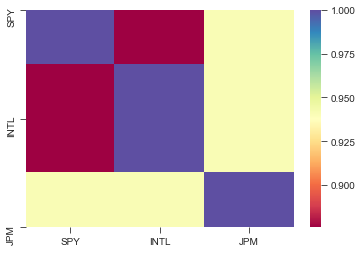

In [35]:
sn.heatmap(correlationmatrix, cbar=True, cmap="Spectral")

In [93]:
#DOING THE REGRESSION
#USING SPY AND INTL


#window = pd.Timedelta('0 days 00:01:00.000000')
window = pd.Timedelta('0 days 00:00:10.000000')
left=SPY
right=INTL
result = pd.merge(left, right, on='Collection_time', how='outer')
result = result.sort_values('Collection_time')
result = result.fillna(method = 'pad')
combine=result.fillna(method = 'bfill')


combine['Collection_time'] = pd.to_datetime(combine['Collection_time'])
combine_values = combine.values

comp_return = np.zeros((combine_values.shape[0], 1))
etf_return = np.zeros((combine_values.shape[0], 1))



In [94]:
ticker = 'INTL'
etf_ticker = 'SPY'

In [95]:
combine

,Unnamed: 0_x,Collection_time,source_time_x,seq_num_x,tick_type_x,market_center_x,price_x,size_x,ticker_x,Unnamed: 0_y,source_time_y,seq_num_y,tick_type_y,market_center_y,price_y,size_y,ticker_y
0,0.0,2019-10-01 12:38:56.652996096,2019-10-01 12:38:56.652954833,43650.0,T,IEX,297.79,400.0,SPY,0.0,2019-10-01 13:30:00.720916735,94974.0,T,IEX,52.13,30.0,INTL
1,1.0,2019-10-01 12:38:58.514365952,2019-10-01 12:38:58.514333061,43659.0,T,IEX,297.79,100.0,SPY,0.0,2019-10-01 13:30:00.720916735,94974.0,T,IEX,52.13,30.0,INTL
2,2.0,2019-10-01 12:40:04.337180928,2019-10-01 12:40:04.337138089,44163.0,T,IEX,297.78,400.0,SPY,0.0,2019-10-01 13:30:00.720916735,94974.0,T,IEX,52.13,30.0,INTL
3,3.0,2019-10-01 12:40:04.337227008,2019-10-01 12:40:04.337205357,44164.0,T,IEX,297.76,1600.0,SPY,0.0,2019-10-01 13:30:00.720916735,94974.0,T,IEX,52.13,30.0,INTL
4,4.0,2019-10-01 12:42:36.169555968,2019-10-01 12:42:36.169517878,45527.0,T,IEX,297.80,40.0,SPY,0.0,2019-10-01 13:30:00.720916735,94974.0,T,IEX,52.13,30.0,INTL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155778,155778.0,2019-10-31 20:39:51.723205120,2019-10-31 20:39:51.723173659,14976977.0,T,IEX,303.33,2000.0,SPY,76518.0,2019-10-31 20:37:57.221349548,14976821.0,T,IEX,56.40,49.0,INTL
155779,155779.0,2019-10-31 20:39:51.732884992,2019-10-31 20:39:51.732862417,14976983.0,T,IEX,303.38,500.0,SPY,76518.0,2019-10-31 20:37:57.221349548,14976821.0,T,IEX,56.40,49.0,INTL
155780,155780.0,2019-10-31 20:39:51.788165120,2019-10-31 20:39:51.788142187,14976990.0,T,IEX,303.50,2000.0,SPY,76518.0,2019-10-31 20:37:57.221349548,14976821.0,T,IEX,56.40,49.0,INTL
155781,155781.0,2019-10-31 20:42:02.941828096,2019-10-31 20:42:02.941797515,14977271.0,T,IEX,303.35,186.0,SPY,76518.0,2019-10-31 20:37:57.221349548,14976821.0,T,IEX,56.40,49.0,INTL


In [96]:
n = combine_values.shape[0]
for i in range(n):
    j = i + 1
    while j < n and combine_values[j,1] - combine_values[i,1] < window:
        j += 1
    
    if j >= n:
        etf_return[i, 0] = np.nan
        comp_return[i, 0]= np.nan
    else:
        etf_return[i, 0] = combine_values[j, 6]/combine_values[i, 6] - 1
        comp_return[i, 0] = combine_values[j, 14]/combine_values[i, 14] - 1


In [97]:
combine['RETURN_'+etf_ticker] = etf_return
combine['RETURN_'+ticker] = comp_return

In [98]:
windows = {'10': pd.Timedelta('0 days 00:00:10.000000'),
           '30': pd.Timedelta('0 days 00:00:30.000000'),
           '60': pd.Timedelta('0 days 00:01:00.000000'),
           '90': pd.Timedelta('0 days 00:01:30.000000')}


combine_values = combine.values

n = combine_values.shape[0]
for k, window in windows.items():
    
    comp_return = np.zeros((combine_values.shape[0], 1))
    etf_return = np.zeros((combine_values.shape[0], 1))
    
    for i in range(n):
        j = i - 1
        
        while j >=0 and combine_values[i,1] - combine_values[j,1] < window:
            j -= 1

        if j < 0:
            etf_return[i, 0] = np.nan
            comp_return[i, 0]= np.nan
        else:
            etf_return[i, 0] = combine_values[i, 6]/combine_values[j, 6] - 1
            comp_return[i, 0] = combine_values[i, 14]/combine_values[j, 14] - 1

    combine['RETURN_'+etf_ticker+'_'+k] = etf_return
    combine['RETURN_'+ticker+'_'+k] = comp_return

In [99]:
combine_valid = combine.dropna(how='any', axis=0)

y = combine_valid.RETURN_SPY.to_list()
x = combine_valid[['RETURN_SPY_10', 'RETURN_SPY_30', 'RETURN_SPY_60', 'RETURN_SPY_90', 
                   'RETURN_INTL_10','RETURN_INTL_30', 'RETURN_INTL_60','RETURN_INTL_90']]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     69.29
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.14e-114
Time:                        22:32:06   Log-Likelihood:             1.6322e+06
No. Observations:              232284   AIC:                        -3.264e+06
Df Residuals:                  232275   BIC:                        -3.264e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.239e-06   4.47e-07     -5.

In [100]:
combine_valid = combine.dropna(how='any', axis=0)

y = combine_valid.RETURN_INTL.to_list()
x = combine_valid[['RETURN_SPY_10', 'RETURN_SPY_30', 'RETURN_SPY_60', 'RETURN_SPY_90', 
                   'RETURN_INTL_10','RETURN_INTL_30', 'RETURN_INTL_60','RETURN_INTL_90']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     287.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:             1.3430e+06
No. Observations:              232284   AIC:                        -2.686e+06
Df Residuals:                  232275   BIC:                        -2.686e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.368e-06   1.55e-06      4.

In [101]:
#get the regression between SPY and JPM
#DOING THE REGRESSION
#USING SPY AND INTL


window = pd.Timedelta('0 days 00:00:10.000000')
left=SPY
right=JPM
result = pd.merge(left, right, on='Collection_time', how='outer')
result = result.sort_values('Collection_time')
result = result.fillna(method = 'pad')
combine=result.fillna(method = 'bfill')


combine['Collection_time'] = pd.to_datetime(combine['Collection_time'])
combine_values = combine.values

comp_return = np.zeros((combine_values.shape[0], 1))
etf_return = np.zeros((combine_values.shape[0], 1))

ticker = 'JPM'
etf_ticker = 'SPY'

n = combine_values.shape[0]
for i in range(n):
    j = i + 1
    while j < n and combine_values[j,1] - combine_values[i,1] < window:
        j += 1
    
    if j >= n:
        etf_return[i, 0] = np.nan
        comp_return[i, 0]= np.nan
    else:
        etf_return[i, 0] = combine_values[j, 6]/combine_values[i, 6] - 1
        comp_return[i, 0] = combine_values[j, 14]/combine_values[i, 14] - 1

combine['RETURN_'+etf_ticker] = etf_return
combine['RETURN_'+ticker] = comp_return

In [102]:
windows = {'10': pd.Timedelta('0 days 00:00:10.000000'),
           '30': pd.Timedelta('0 days 00:00:30.000000'),
           '60': pd.Timedelta('0 days 00:01:00.000000'),
           '90': pd.Timedelta('0 days 00:01:30.000000')}

combine_values = combine.values

n = combine_values.shape[0]
for k, window in windows.items():
    
    comp_return = np.zeros((combine_values.shape[0], 1))
    etf_return = np.zeros((combine_values.shape[0], 1))
    
    for i in range(n):
        j = i - 1
        
        while j >=0 and combine_values[i,1] - combine_values[j,1] < window:
            j -= 1

        if j < 0:
            etf_return[i, 0] = np.nan
            comp_return[i, 0]= np.nan
        else:
            etf_return[i, 0] = combine_values[i, 6]/combine_values[j, 6] - 1
            comp_return[i, 0] = combine_values[i, 14]/combine_values[j, 14] - 1

    combine['RETURN_'+etf_ticker+'_'+k] = etf_return
    combine['RETURN_'+ticker+'_'+k] = comp_return

In [103]:
combine_valid = combine.dropna(how='any', axis=0)

y = combine_valid.RETURN_SPY.to_list()
x = combine_valid[['RETURN_SPY_10', 'RETURN_SPY_30', 'RETURN_SPY_60', 'RETURN_SPY_90', 
                   'RETURN_JPM_10','RETURN_JPM_30', 'RETURN_JPM_60','RETURN_JPM_90']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     60.31
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           5.30e-99
Time:                        22:48:10   Log-Likelihood:             1.5323e+06
No. Observations:              217245   AIC:                        -3.065e+06
Df Residuals:                  217236   BIC:                        -3.064e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.244e-06   4.49e-07     -4.993

In [104]:
combine_valid = combine.dropna(how='any', axis=0)

y = combine_valid.RETURN_JPM.to_list()
x = combine_valid[['RETURN_SPY_10', 'RETURN_SPY_30', 'RETURN_SPY_60', 'RETURN_SPY_90', 
                   'RETURN_JPM_10','RETURN_JPM_30', 'RETURN_JPM_60','RETURN_JPM_90']]


x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:48:10   Log-Likelihood:             1.3916e+06
No. Observations:              217245   AIC:                        -2.783e+06
Df Residuals:                  217236   BIC:                        -2.783e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.164e-06   8.59e-07     -1.356